In [1]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import copy

In [3]:
plt.rcParams['figure.figsize'] = (30,10)

In [4]:
from tfflat.base import Tester
from utils.model import Model

In [5]:
from src.core.pose_estimation import PoseEstimator

In [6]:
from settings.base import POSE_ESTIMATION_MODEL_FOLDER

In [7]:
pose_estimator = PoseEstimator(POSE_ESTIMATION_MODEL_FOLDER)

10-20 16:38:00 Generating testing graph on 1 GPUs ...


[TOOL-DETECTION-SERVICE-0] [INFO] 2020-10-20 16:38:00 [test_logs.txt:info] Generating testing graph on 1 GPUs ...


10-20 16:38:06 Initialized model weights from /home/ocrv/Projects/pose-estimation-service-develop/models/snapshot140/snapshot_140.ckpt ...


[TOOL-DETECTION-SERVICE-0] [INFO] 2020-10-20 16:38:06 [test_logs.txt:info] Initialized model weights from /home/ocrv/Projects/pose-estimation-service-develop/models/snapshot140/snapshot_140.ckpt ...


10-20 16:38:06 Current epoch is 140.


[TOOL-DETECTION-SERVICE-0] [INFO] 2020-10-20 16:38:06 [test_logs.txt:info] Current epoch is 140.


In [8]:
main_imgs_path = '/home/ocrv/Projects/big_challenge/train/yolov5_2/content/test/images'

imgs_path = glob(f'{main_imgs_path}/*.JPG')

In [9]:
img = cv2.imread(imgs_path[10])

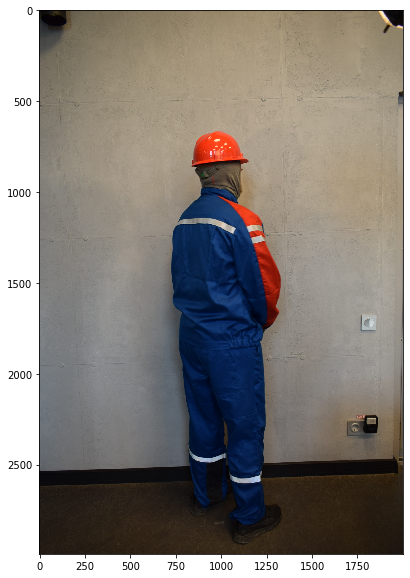

In [10]:
plt.imshow(img[:, :, ::-1])

In [11]:
detects = pose_estimator.predict(img, [[0,0, 2992, 2000]])

In [13]:
detects

[{'l_sho': {'x': 0.505, 'y': 0.406, 'proba': 0.388},
  'r_sho': {'x': 0.524, 'y': 0.406, 'proba': 0.444},
  'l_elb': {'x': 0.621, 'y': 0.484, 'proba': 0.39},
  'r_elb': {'x': 0.621, 'y': 0.497, 'proba': 0.357},
  'l_wri': {'x': 0.621, 'y': 0.536, 'proba': 0.405},
  'r_wri': {'x': 0.621, 'y': 0.536, 'proba': 0.496}}]

In [14]:
def scale_points(img_shape, detects):
    detects_s = copy.deepcopy(detects)
    for i, detect in enumerate(detects):
        for key_name, points_dict in detect.items():
            x_scaled = int(points_dict['x'] * img_shape[1])
            y_scaled = int(points_dict['y'] * img_shape[0])
            detects_s[i][key_name] = {'x':x_scaled, 'y':y_scaled, 'proba': points_dict['proba']}
    return detects_s

In [15]:
detects_s = scale_points(img.shape, detects)

In [16]:
detects_s

[{'l_sho': {'x': 1010, 'y': 1214, 'proba': 0.388},
  'r_sho': {'x': 1048, 'y': 1214, 'proba': 0.444},
  'l_elb': {'x': 1242, 'y': 1448, 'proba': 0.39},
  'r_elb': {'x': 1242, 'y': 1487, 'proba': 0.357},
  'l_wri': {'x': 1242, 'y': 1603, 'proba': 0.405},
  'r_wri': {'x': 1242, 'y': 1603, 'proba': 0.496}}]

In [17]:
def print_points(img,detects,copy=True):
    if copy:
        img = img.copy()
        
    for detect in detects:
        for key_name, points_dict in detect.items():
            img = cv2.circle(img, (points_dict['x'],points_dict['y']), 30, (0,255,0), -1)
        
    if copy:
        return img

In [18]:
printed_img = print_points(img, detects_s)

key_name =  l_sho
points_dict =  {'x': 1010, 'y': 1214, 'proba': 0.388}
key_name =  r_sho
points_dict =  {'x': 1048, 'y': 1214, 'proba': 0.444}
key_name =  l_elb
points_dict =  {'x': 1242, 'y': 1448, 'proba': 0.39}
key_name =  r_elb
points_dict =  {'x': 1242, 'y': 1487, 'proba': 0.357}
key_name =  l_wri
points_dict =  {'x': 1242, 'y': 1603, 'proba': 0.405}
key_name =  r_wri
points_dict =  {'x': 1242, 'y': 1603, 'proba': 0.496}


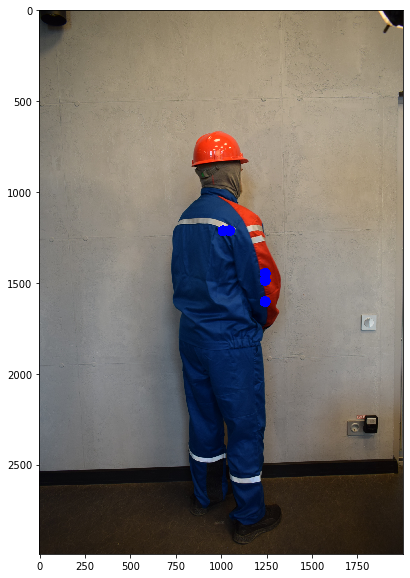

In [19]:
plt.imshow(printed_img[:, :, ::-1])